### **TRABAJO PRÁCTICO N° 2: Modelo predictivo de lluvia en Australia**
---
 2do cuatrimestre - Año 2025

| **Integrantes**           | **Legajo** |
|---------------------------|------------|
| Casado, Gustavo.          | C-7296/6   |
| Martinez Dufour, Caterina | M-7169/2   |

**Docentes:** *Joel Spak* - *Agustín Almada* - *Bruno Cocitto López*

**Fecha límite de entrega item 1, 2, 3:** 21/10

**Fecha límite de entrega item 4, 5, 6, 7:** 07/11

**Fecha límite de entrega item 8, 9, 10, 11:** 29/11

### Descripción del dataset
---
En este trabajo, nuestro objetivo es **predecir futuros dias donde llovera en Australia**.  El dataset se llama weatherAUS.csv y contiene información climática de Australia de los últimos diez años, incluyendo si para el día siguiente llovió o no en la columna ‘RainTomorrow’. El objetivo del trabajo práctico es armar un ejecutable de Docker para predecir, a las 23:59:59hs de cada día, si el día siguiente va a llover o no.


#### Variables del conjunto de datos  

**Variables explicativas:**  
- **Date**: Fecha en la que se registraron los datos.
- **Location**: Nombre de la zona donde se obtuvo la observación.
- **MinTemp**: Temperatura mínima en grados (°C).
- **MaxTemp**: Temperatura máxima en grados (°C).
- **Rainfall**: Precipitación en milímetros (mm).
- **Evaporation**: Cantidad de agua evaporada en milímetros (mm).
- **Sunshine**: 
- **WindGustDir**:  Dirección del viento.
- **WindGustSpeed**: Velocidad del viento (km/h).
- **WindDir9am**: Dirección del viento a las 9am
- **WindDir3pm**: Dirección del viento a las 3pm
- **WindSpeed9am**: Velocidad del viento a las 9am (km/h).
- **WindSpeed3pm**: Velocidad del viento a las 3pm (km/h).
- **Humidity9am**: Humedad relativa a las 9am (%).
- **Humidity3pm**:  Humedad relativa a las 3pm (%).
- **Pressure9am**: Presión atmosférica a las 9am (hPa).
- **Pressure3pm**: Presión atmosférica a las 3pm (hPa).
- **Cloud9am**: Cantidad de cielo cubierto con nubes a las 9am (octas).
- **Cloud3pm**: Cantidad de cielo cubierto con nubes a las 3pm (octas).
- **Temp9am**: Temperatura a las 9am (°C).
- **Temp3pm**: Temperatura a las 3pm (°C).
- **RainToday**:  Indicador si llovió ese dia (Yes/No)

**Variable objetivo (target):**  
- **RainTomorrow**: Indica si llovió al día siguiente (Yes/No)

In [189]:
# Librerías
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans

### Carga del dataset
---

Se utilizó la biblioteca pandas para leer los datos almacenados en el archivo CSV y convertirlos en un DataFrame. Para corroborar que los datos se hayan cargado correctamente, se visualizaron las primeras cinco filas mediante el método '.head()'. Además, se empleó el método '.info()' para obtener información general del dataset, verificar que el tipo de dato en cada variable es correcto, detectar la presencia de valores nulos y valores atípicos.

In [190]:
# Carga del dataset
file_path= 'weatherAUS.csv'
df = pd.read_csv(file_path)

### Transformación de clusters de ciudades a una nueva categoría "Regiones"
---

Se  solicita  en  primera  instancia  crear  clusters  con  las  ciudades del Dataset para 
catalogarlas en otra categoría: regiones. La cantidad de regiones será definida por 
cada  grupo,  observarlas  en  un  gráfico  de  latitud  y  longitud  para  acompañar  la 
decisión. (obtuve los datos de longitud y latitud en 'www.latlong.net')

In [191]:
len(df['Location'].unique())

49

In [192]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [193]:
renombrar = { 
    "BadgerysCreek": "Badgerys Creek", "CoffsHarbour": "Coffs Harbour", "NorahHead" : "Norah Head", "NorfolkIsland" : "Norfolk Island", "SydneyAirport": "Sydney Airport",
    "WaggaWagga" : "Wagga Wagga", "MountGinini": "Mount Ginini", "MelbourneAirport" : "Melbourne Airport", "Nhil" : "Nhill", "GoldCoast" : "Gold Coast", 
    "MountGambier" : "Mount Gambier", "PerthAirport" : "Perth Airport", "SalmonGums" : "Salmon Gums", "AliceSprings" : "Alice Springs", "PearceRAAF" : "RAFF Base Pearce"
}

# Renombra los nombres del dataset
df["Location"] = df["Location"].replace(renombrar)

In [194]:
coordenadas = {
    "Albury": (-36.073730, 146.913544), "Badgerys Creek": (-33.887421, 150.740509), "Cobar": (-31.494930, 145.840164), "Coffs Harbour": (-30.298613, 153.109390),
    "Moree": (-29.463551, 149.841721), "Newcastle": (-32.926670, 151.780014), "Norah Head": (-33.283340, 151.566116), "Norfolk Island": (-29.040834, 167.954712),
    "Penrith": (-33.752918, 150.690674), "Richmond": (-42.735809, 147.437088), "Sydney": (-33.868820, 151.209290), "Sydney Airport": (-33.939922, 151.175278),
    "Wagga Wagga": (-35.114750, 147.369614), "Williamtown": (-32.814999, 151.842773), "Wollongong": (-34.427811, 150.893066), "Canberra": (-35.280937, 149.130005),
    "Tuggeranong": (-35.424400, 149.088806), "Mount Ginini": (-37.828410, 140.780656), "Ballarat": (-37.562160, 143.850250), "Bendigo": (-36.759338, 144.283997),
    "Sale": (-38.107250, 147.067291), "Melbourne Airport": (-37.670528, 144.848938), "Melbourne": (-37.813629, 144.963058), "Mildura": (-34.210468, 142.142044),
    "Nhill": (-36.332472, 141.649494), "Portland": (-38.342281, 141.603958), "Watsonia": (-37.711699, 145.082002), "Dartmoor": (-37.919090, 141.274673),
    "Brisbane": (-27.470030, 153.022980), "Cairns": (-16.918550, 145.778061), "Gold Coast": (-28.001499, 153.428467), "Townsville": (-19.258965, 146.816956),
    "Adelaide": (-34.927170, 138.599533), "Mount Gambier": (-37.828411, 140.780655), "Nuriootpa": (-34.471859, 138.996216), "Woomera": (-31.200684, 136.825919),
    "Albany": (-35.023819, 117.884727), "Witchcliffe": (-34.025699, 115.100107), "RAFF Base Pearce": (-17.591089, 123.777382), "Perth Airport": (-31.932739, 115.960258),
    "Perth": (-31.950527, 115.860458), "Salmon Gums": (-32.982075, 121.644170), "Walpole": (-34.976129, 116.731910), "Hobart": (-42.881901, 147.323807),
    "Launceston": (-41.437019, 147.139389), "Alice Springs": (-23.700680, 133.880707), "Darwin": (-12.463440, 130.845642), "Katherine": (-14.464970, 132.264267),
    "Uluru": (-25.344427, 131.036880)
}

In [195]:
df['Latitud'] = df['Location'].map(lambda x: coordenadas.get(x, (None, None))[0])
df['Longitud'] = df['Location'].map(lambda x: coordenadas.get(x, (None, None))[1])

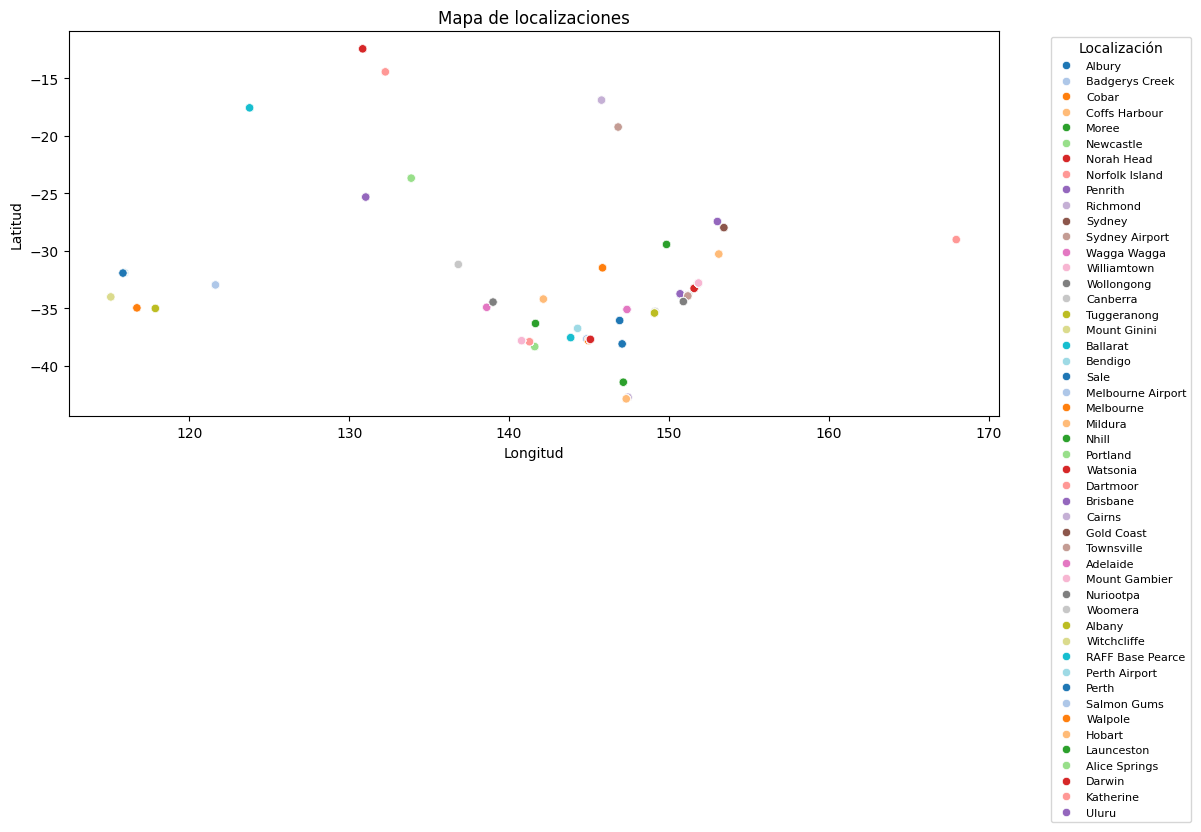

In [196]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Longitud', y='Latitud', data=df, hue='Location', palette='tab20')
plt.title('Mapa de localizaciones')
plt.legend(title="Localización", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.show()

Para determinar el número óptimo de regiones en las que se agrupan las zonas donde se tomaron datos sobre la lluvia, se empleó el método del Codo. Este método utiliza k-means para un rango de valores de k y calcula la inercia para cada iteración. Para saber que valor seleccionar, observamos el gráfico del codo

In [197]:
X = df[['Latitud', 'Longitud']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

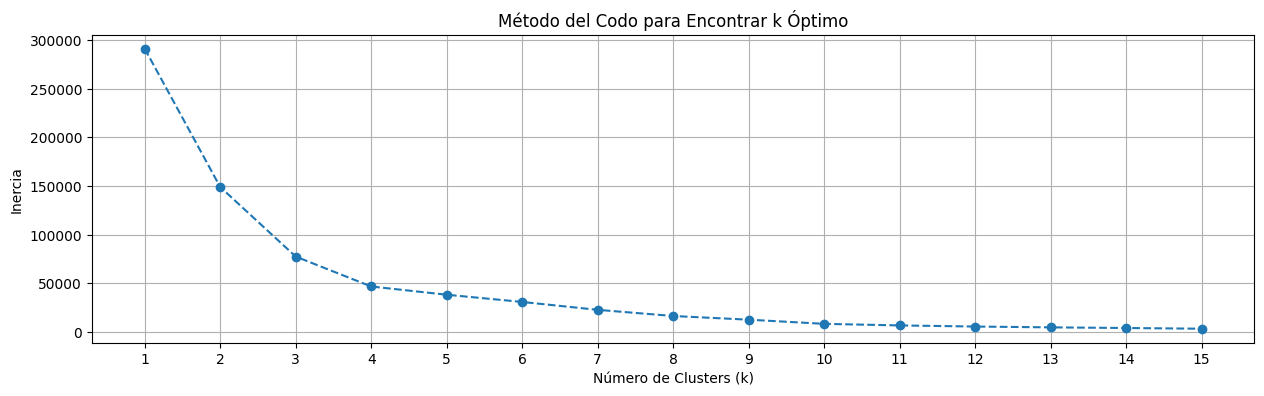

In [198]:
inertias = []
max_k = 15

# Calculamos la inercia para cada k
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(15,4))
plt.plot(range(1, max_k + 1), inertias, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Encontrar k Óptimo')
plt.grid(True)
plt.xticks(range(1, max_k + 1))
plt.show()

Este método muestra que hay un quiebre en k = 4 debido a que se ve una caída fuerte hasta este valor y luego el descenso es mucho más leve. Es por esta razón que podemos concluir que el valor optimo para dividir las localizaciones será en 4 regiones (norte, sur, este y oeste).

In [199]:
kmeans = KMeans(n_clusters = 4, random_state=42, n_init = 10)
df['Regiones'] = kmeans.fit_predict(X_scaled)

In [200]:
etiqueta = {0: 'Sur', 1: 'Norte', 2: 'Este', 3: 'Oeste'}
df['Regiones'] = df['Regiones'].map(etiqueta)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitud,Longitud,Regiones
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,-36.07373,146.913544,Sur
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,-36.07373,146.913544,Sur
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,-36.07373,146.913544,Sur
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,-36.07373,146.913544,Sur
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,-36.07373,146.913544,Sur


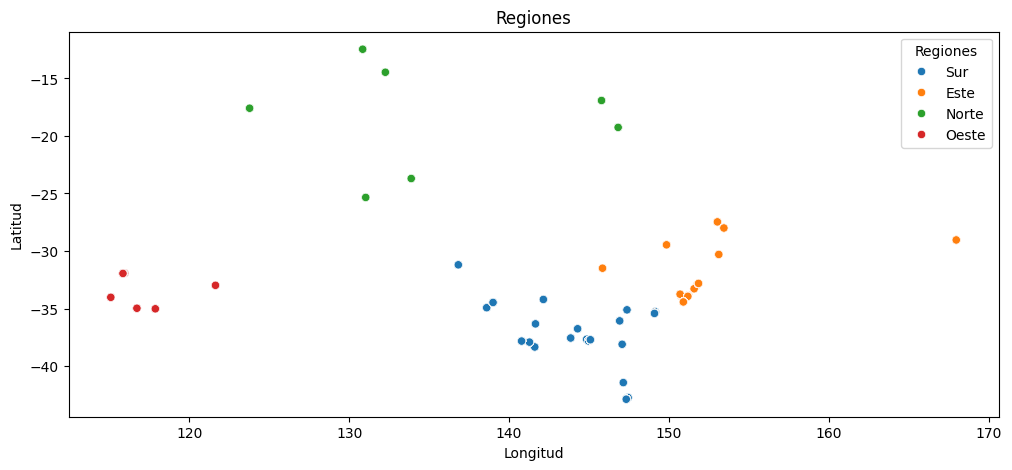

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x="Longitud", y="Latitud", hue="Regiones", data=df, palette="tab10")
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title(f'Regiones')
plt.legend(title="Regiones")
plt.show()

### Analisis descriptivo
---

Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada una  de  las  variables  involucradas,  detallando:  características,  comportamiento  y 
rango de variación. ¿Qué es cada variable?. Debe incluir: 

●  Análisis y decisión sobre datos faltantes. 

●  Visualización de datos (por ejemplo histogramas, scatterplots entre variables, diagramas de caja) 

●  ¿Está balanceado el dataset? ¿Por qué cree que hacemos esta pregunta? 

●  Codificación de variables categóricas (si se van a utilizar para predicción). 

●  Matriz de correlación de variables. 

●  Estandarización/escalado de datos. 

●  Validación cruzada train - test. Realizar una división del conjunto de datos en  conjuntos  de  entrenamiento  y  prueba  (y  si  se  quiere,  se  puede  incluir  validación, que luego será útil) en el MOMENTO donde lo crean adecuado

### Transformación del dataset original
---

#### Análisis y decisión sobre datos faltantes

In [202]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Latitud              0
Longitud             0
Regiones             0
dtype: int64

In [203]:
def calcular_porcentaje(faltante, total):
    if total == 0:
        return 0 # para evitar la division por cero
    
    porcentaje = (faltante / total) * 100
    return porcentaje 

def imprimir_porcentaje(porcentaje, columna):
    print(f"{columna}: {porcentaje:.2f}%")
    return

def datos_faltantes(columna):
    faltante = df[columna].isnull().sum()
    total = len(df)
    porcentaje = calcular_porcentaje(faltante, total)
    imprimir_porcentaje(porcentaje, columna)
    return 

print("Porcentaje de los valores faltantes de todas las columnas:")
for columna in df.columns:
    datos_faltantes(columna)

Porcentaje de los valores faltantes de todas las columnas:
Date: 0.00%
Location: 0.00%
MinTemp: 1.02%
MaxTemp: 0.87%
Rainfall: 2.24%
Evaporation: 43.17%
Sunshine: 48.01%
WindGustDir: 7.10%
WindGustSpeed: 7.06%
WindDir9am: 7.26%
WindDir3pm: 2.91%
WindSpeed9am: 1.21%
WindSpeed3pm: 2.11%
Humidity9am: 1.82%
Humidity3pm: 3.10%
Pressure9am: 10.36%
Pressure3pm: 10.33%
Cloud9am: 38.42%
Cloud3pm: 40.81%
Temp9am: 1.21%
Temp3pm: 2.48%
RainToday: 2.24%
RainTomorrow: 2.25%
Latitud: 0.00%
Longitud: 0.00%
Regiones: 0.00%


Podemos observar que las columnas que poseen un mayor valor de faltantes son los siguientes:
- Evaporation: 43.17%
- Sunshine: 48.01%
- Cloud9am: 38.42%
- Cloud3pm: 40.81%

El resto de valores tiene un porcentaje menor al 10% aproximadamente por lo que estos datos veria correcto imputarlos de ser necesario con algun metodo luego de dividir el dataset. El resto de columnas que posee esa gran cantidad de datos faltantes (30-50%) diria de eliminarlos del dataset debido que al ser un valor tan elevado de faltantes imputar los datos serian bastante lo que afectaria en un futuro al predecir el modelo.

In [204]:
columnas = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']
df = df.drop(columns=columnas)

#### Transformación de datos y variables de interés

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

Teniendo en cuenta las variables que poseemos, considero que al hacer la columna "Regiones" ya no es necesario mantener en el dataset "Location" debido que ya estamos representando estos datos por zonas. Por otro lado debemos transformar probablemente la columna "Date" para poder agregarlo al modelo (por ejemplo: dia de la semana, mes y año).

In [206]:
df['Date'] = pd.to_datetime(df['Date'])  

In [207]:
df['day_of_week'] = df['Date'].dt.dayofweek
def dia_semana(dia):
    if dia == 0:
        return 'Lunes'
    elif dia == 1:
        return 'Martes'
    elif dia == 2:
        return 'Miercoles'
    elif dia == 3:
        return 'Jueves'
    elif dia == 4:
        return 'Viernes'
    elif dia == 5:
        return 'Sabado'
    else:
        return 'Domingo'
    
df['day_of_week'] = df['day_of_week'].apply(dia_semana)

In [208]:
df['week'] = df['Date'].dt.day_of_week
def mes(d_mes):
    if d_mes == 0:
        return 'Enero'
    elif d_mes == 1:
        return 'Febrero'
    elif d_mes == 2:
        return 'Marzo'
    elif d_mes == 3:
        return 'Abril'
    elif d_mes == 4:
        return 'Mayo'
    elif d_mes == 5:
        return 'Junio'
    elif d_mes == 6:
        return 'Julio'
    elif d_mes == 7:
        return 'Agosto'
    elif d_mes == 8:
        return 'Septiembre'
    elif d_mes == 9:
        return 'Octubre'
    elif d_mes == 10:
        return 'Noviembre'
    elif d_mes == 11:
        return 'Diciembre'
    
df['week'] = df['week'].apply(mes)

In [209]:
df['Year'] = df['Date'].dt.year

In [210]:
# Eliminación de columnas que no son de interes
columnas = ['Date', 'Location']
df = df.drop(columns=columnas)

In [211]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitud,Longitud,Regiones,day_of_week,week,Year
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,...,16.9,21.8,No,No,-36.07373,146.913544,Sur,Lunes,Enero,2008
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,...,17.2,24.3,No,No,-36.07373,146.913544,Sur,Martes,Febrero,2008
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,...,21.0,23.2,No,No,-36.07373,146.913544,Sur,Miercoles,Marzo,2008
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,...,18.1,26.5,No,No,-36.07373,146.913544,Sur,Jueves,Abril,2008
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,...,17.8,29.7,No,No,-36.07373,146.913544,Sur,Viernes,Mayo,2008


### Validación cruzada train - test
---

El siguiente paso consiste en dividir el dataset en conjuntos de entrenamiento y prueba. Se separó el 80% de los datos para entrenamiento y el 20% restante para prueba.

In [212]:
# dividir df en train y test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [213]:
train_df.shape, test_df.shape

((116368, 23), (29092, 23))

### Transformación del dataset
---

Luego de esto, realizamos un '.describe()' sobre las variables numericas y consideramos los resultados para analizar cada variable del dataset.

In [214]:
train_df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Latitud,Longitud,Year
count,115190.00000,115370.000000,113764.000000,108166.000000,114960.000000,113911.000000,114251.000000,112752.000000,104307.000000,104326.000000,114963.000000,113471.000000,116368.000000,116368.000000,116368.000000
mean,12.19708,23.219542,2.378870,40.036056,14.052157,18.663492,68.908062,51.551041,1017.639292,1015.246449,16.991923,21.684229,-32.720421,142.031745,2012.775308
std,6.39974,7.117535,8.537384,13.631077,8.918674,8.819087,19.015417,20.784322,7.119666,7.052257,6.488468,6.937204,6.568566,11.717489,2.540573
min,-8.50000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,-7.200000,-5.400000,-42.881901,115.100107,2007.000000
25%,7.60000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000,-37.562160,138.599533,2011.000000
50%,12.00000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,-34.025699,145.778061,2013.000000
75%,16.90000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000,-31.200684,150.690674,2015.000000
max,31.90000,47.300000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,-12.463440,167.954712,2017.000000


#### Analisis de las variables 'MinTemp' y 'MaxTemp'

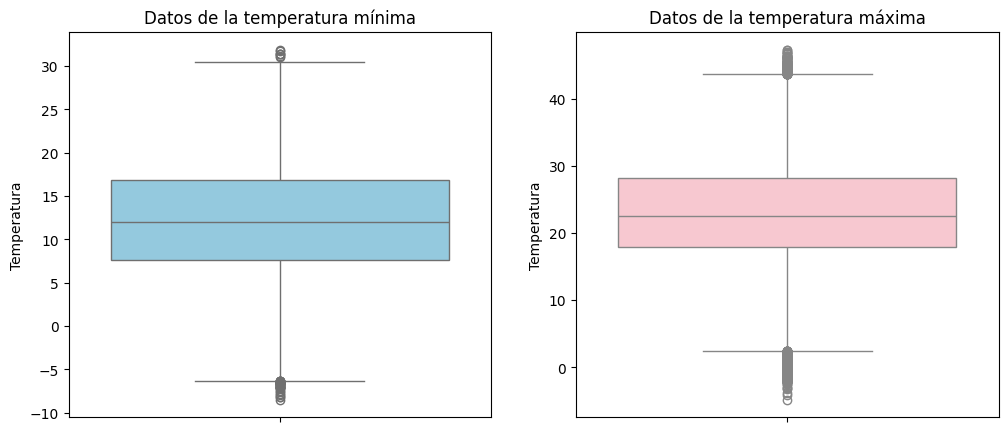

In [215]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title("Datos de la temperatura mínima")
sns.boxplot(train_df['MinTemp'], color="skyblue")
plt.ylabel('Temperatura')

plt.subplot(1, 2, 2)
plt.title("Datos de la temperatura máxima")
sns.boxplot(train_df['MaxTemp'], color="pink")
plt.ylabel('Temperatura')

plt.show()

In [216]:
median_min= train_df['MinTemp'].median()
print(f"Mediana de MinTemp: {round(median_min,2)}")

Mediana de MinTemp: 12.0


In [217]:
print(f"Total de casos imputados con la mediana en train: { train_df['MinTemp'].isnull().sum()} ")
print(f"Total de casos imputados con la mediana en test: {test_df['MinTemp'].isnull().sum()} ")

train_df['MinTemp'] = train_df['MinTemp'].fillna(median_min)
test_df['MinTemp'] = test_df['MinTemp'].fillna(median_min)

Total de casos imputados con la mediana en train: 1178 
Total de casos imputados con la mediana en test: 307 


In [220]:
median_max= train_df['MaxTemp'].median()
print(f"Mediana de MaxTemp: {round(median_max,2)}")

Mediana de MaxTemp: 22.6


In [221]:
print(f"Total de casos imputados con la mediana en train: { train_df['MaxTemp'].isnull().sum()} ")
print(f"Total de casos imputados con la mediana en test: {test_df['MaxTemp'].isnull().sum()} ")

train_df['MaxTemp'] = train_df['MaxTemp'].fillna(median_min)
test_df['MaxTemp'] = test_df['MaxTemp'].fillna(median_min)

Total de casos imputados con la mediana en train: 998 
Total de casos imputados con la mediana en test: 263 


In [224]:
train_df[['MinTemp', 'MaxTemp']].isnull().sum()

MinTemp    0
MaxTemp    0
dtype: int64